In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

60000 train samples
10000 test samples


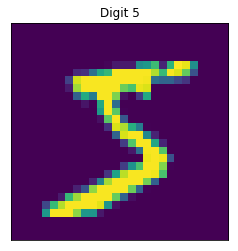

In [2]:
#MNIST
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as k

class MNISTClass:
    def __init__(self):
        img_rows = 28
        img_cols = 28
        self.num_classes = 10
        
        
        
        color_channels = 1
        
        (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()
        (self.x_train_images, self.y_train_labels), (self.x_test_images, self.y_test_labels) = mnist.load_data()
        
        
        if k.image_data_format() == "channels_first":
            self.x_train = self.x_train.reshape(self.x_train.shape[0], color_channels, img_rows, img_cols)
            self.x_test = self.x_test.reshape(self.x_test.shape[0], color_channels, img_rows, img_cols)
        else:
            self.x_train = self.x_train.reshape(self.x_train.shape[0], img_rows, img_cols, color_channels)
            self.x_test = self.x_test.reshape(self.x_test.shape[0], img_rows, img_cols, color_channels)
            self.input_shape = (img_rows, img_cols, color_channels)
            
        #pixels converted from int 0-255 to float 0-1
        self.x_train = self.x_train.astype('float32')    
        self.x_test = self.x_test.astype('float32') 
        self.x_train /= 255
        self.x_test /= 255
        
        
#         one hot coding
        self.y_train = keras.utils.to_categorical(self.y_train, self.num_classes)
        self.y_test = keras.utils.to_categorical(self.y_test, self.num_classes)
        
        print(self.x_train.shape[0], 'train samples')
        print(self.x_test.shape[0], 'test samples')
        
        self.show_train_images(0)
        
    def show_train_images(self, index):
        plt.imshow(self.x_train_images[index])
        plt.title("Digit " + str(self.y_train_labels[index]))
        plt.xticks([])
        plt.yticks([])
        plt.show()

    def show_test_image(self, index, predicted_label):
        plt.imshow(self.x_test_images[index] )
        plt.title("Actual: Digit " + str(self.y_test_labels[index]) + " Predicted: Digit " + str(predicted_label))
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
mnist_data = MNISTClass()

50000 train samples
10000 test samples


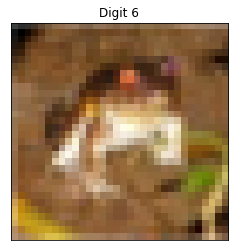

In [3]:
#CIFAR
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as k

class CIFARClass:
    def __init__ (self):
        img_rows = 28
        img_cols = 28
        self.num_classes = 10
        color_channels = 3
        self.label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        
        (self.x_train, self.y_train), (self.x_test, self.y_test) = cifar10.load_data()
        (self.x_train_images, self.y_train_labels), (self.x_test_images, self.y_test_labels) = cifar10.load_data()
            
        #pixels converted from int 0-255 to float 0-1
        self.x_train = self.x_train.astype('float32')    
        self.x_test = self.x_test.astype('float32') 
        self.x_train /= 255
        self.x_test /= 255
        
        self.y_train_labels = [item for sublist in self.y_train_labels for item in sublist]
        self.y_test_labels = [item for sublist in self.y_test_labels for item in sublist]
        
        
        
        self.y_train = keras.utils.to_categorical(self.y_train, self.num_classes)
        self.y_test = keras.utils.to_categorical(self.y_test, self.num_classes)
        
        self.input_shape = (img_rows, img_cols, color_channels)
        
        print(self.x_train.shape[0], 'train samples')
        print(self.x_test.shape[0], 'test samples')
        
        self.show_train_images(0)
        
    def show_train_images(self, index):
        plt.imshow(self.x_train_images[index])
        plt.title("Digit " + str(self.y_train_labels[index]))
        plt.xticks([])
        plt.yticks([])
        plt.show()

    def show_test_image(self, index, predicted_label):
        plt.imshow(self.x_test_images[index] )
        plt.title("Actual: Digit " + str(self.y_test_labels[index]) + " Predicted: Digit " + str(predicted_label))
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
cifar10_data = CIFARClass()
        
        
        

In [4]:
##Running MNIST       MODEL 6-92%
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

def run_model(data):
    epochs = 15
    batch_size = 200
    model = Sequential()
    
    
    model.add(Conv2D(filters = 124, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
    
# #     adds layers | 2D searching | filters is  num of filter, moves across at 3 by 3 pixel
#     model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=data.input_shape))
#     model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
# #     skips over pixils
#     model.add(MaxPooling2D(pool_size=(2,2), strides=2))
#     model.add(Dense(units = 128, activation='relu'))
# #     doesnt activate all nuerons
#     model.add(Dropout(rate=0.5))

    model.add(Flatten())
    model.add(Dense(units = data.num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
    model.fit(data.x_train, data.y_train, batch_size = batch_size, epochs = epochs, validation_data = (data.x_test, data.y_test), shuffle = True)
    scores = model.evaluate(data.x_test, data.y_test, verbose = 0)
    print("Test Accuracy: ", scores[1])
    return model

mnist_model = run_model(mnist_data)
# cifar10_model = run_model(cifar10_data)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 19s 320us/sample - loss: 2.2899 - acc: 0.1959 - val_loss: 2.2736 - val_acc: 0.3028
Epoch 2/15
60000/60000 [==============================] - 13s 209us/sample - loss: 2.2465 - acc: 0.3716 - val_loss: 2.2042 - val_acc: 0.4411
Epoch 3/15
60000/60000 [==============================] - 13s 212us/sample - loss: 2.1117 - acc: 0.5221 - val_loss: 1.9522 - val_acc: 0.6454
Epoch 4/15
60000/60000 [==============================] - 13s 209us/sample - loss: 1.5890 - acc: 0.7266 - val_loss: 1.0987 - val_acc: 0.7927
Epoch 5/15
60000/60000 [==============================] - 13s 210us/sample - loss: 0.8251 - acc: 0.8081 - val_loss: 0.6176 - val_acc: 0.8402
Epoch 6/15
60000/60000 [==============================] - 13s 211us/sample - loss: 0.5761 - acc: 0.8412 - val_loss: 0.5022 - va

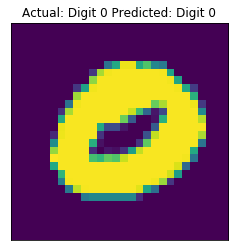

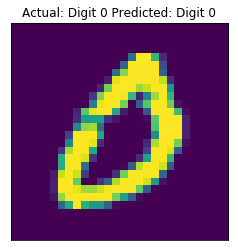

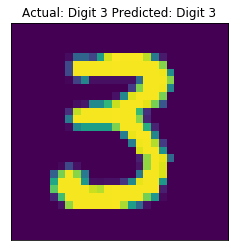

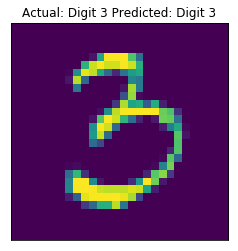

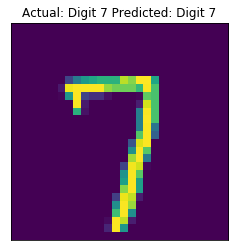

In [5]:
#Showing Incorect Images
import random

def incorrect_images(data, model, num):
    predicted_labels = model.predict(data.x_test)
    incorrect_indicies = []
    
    for index in range(len(predicted_labels)):
        if predicted_labels[index].argmax() != data.y_test_labels[index]:
            incorrect_indicies.append(index)
            
    incorrect_indicies = random.sample(incorrect_indicies, num)
        
    for image in incorrect_indicies:
        data.show_test_image(image, predicted_labels[image].argmax())
        
def correct_images(data, model, num):
    predicted_labels = model.predict(data.x_test)
    correct_indicies = []
    
    for index in range(len(predicted_labels)):
        if predicted_labels[index].argmax() == data.y_test_labels[index]:
            correct_indicies.append(index)
            
    incorrect_indicies = random.sample(correct_indicies, num)
        
    for image in incorrect_indicies:
        data.show_test_image(image, predicted_labels[image].argmax())
            
# Incorrect Imgaes
correct_images(mnist_data, mnist_model, 5)

In [6]:
def run_model(data):
    epochs = 5
    batch_size = 20
    model = Sequential()
    
    
    model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=data.input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu'))

    model.add(Flatten())
    model.add(Dense(units = data.num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
    model.fit(data.x_train, data.y_train, batch_size = batch_size, epochs = epochs, validation_data = (data.x_test, data.y_test), shuffle = True)
    scores = model.evaluate(data.x_test, data.y_test, verbose = 0)
    print("Test Accuracy: ", scores[1])
    return model

# mnist_model = run_model(mnist_data)
cifar10_model = run_model(cifar10_data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 33s 666us/sample - loss: 2.3014 - acc: 0.1025 - val_loss: 2.2985 - val_acc: 0.1234
Epoch 2/5
50000/50000 [==============================] - 30s 594us/sample - loss: 2.2976 - acc: 0.1154 - val_loss: 2.2943 - val_acc: 0.1174
Epoch 3/5
50000/50000 [==============================] - 29s 585us/sample - loss: 2.2924 - acc: 0.1225 - val_loss: 2.2883 - val_acc: 0.1158
Epoch 4/5
50000/50000 [==============================] - 30s 608us/sample - loss: 2.2859 - acc: 0.1204 - val_loss: 2.2792 - val_acc: 0.1223
Epoch 5/5
50000/50000 [==============================] - 31s 626us/sample - loss: 2.2750 - acc: 0.1314 - val_loss: 2.2634 - val_acc: 0.1384
Test Accuracy:  0.1384


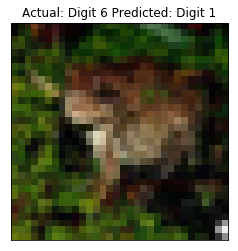

In [7]:
incorrect_images(cifar10_data, cifar10_model, 1)